[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neurogym/ngym_usage/blob/master/supervised/auto_notebooks/supervised/PerceptualDecisionMaking-v0.ipynb)

# Recurrent Neural Networks

## 0. Installs, packages, auxiliary functions

### 0.1. Install Neurogym

We will use the toolbox [**Neurogym**](https://github.com/neurogym/neurogym/) to define the tasks that our RNNs will have to learn. 
**NeuroGym** is a curated collection of neuroscience tasks with a common interface. It's main goal is to facilitate training of neural network models on neuroscience tasks.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Suk5bvKiFqZCmIu4f1pWNghBxrznJ0U_" alt="drawing" width="1000"/>
</p>

In [12]:
# Uncomment following lines to install
# ! pip install gym   # Install gym
# ! git clone https://github.com/gyyang/neurogym.git  # Install neurogym
# %cd neurogym/
# ! pip install -e .

### 0.2. Imports

Import the packages we need for training and analyzing the RNNs. Especially, we will use the toolbox [pytorch](https://pytorch.org/) to define and train the networks.

In [2]:
# packages to save data
import os
from pathlib import Path
import json

# packages to handle data
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# packages to visualize data
import matplotlib.pyplot as plt

# import torch and neural network modules to build RNNs
import torch
import torch.nn as nn

# import gym and neurogym to create tasks
import gym
import neurogym as ngym
from neurogym.utils import plotting

# check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# name of the task on the neurogym library
envid = 'PerceptualDecisionMaking-v0'

### 0.3. Auxiliary functions

We need to create a path to save the data from the network that we will analize.

In [3]:
def get_modelpath(envid):
    
    # Make a local file directories
    path = Path('.') / 'files'
    os.makedirs(path, exist_ok=True)
    path = path / envid
    os.makedirs(path, exist_ok=True)
    
    return path

## 1. Training an RNN

In this tutorial, we will work with Recurrent Neural Network (RNN) which are articificial neural networks that contain recurrent connections between their units. 

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1ENHA_qKp3Cl_D0qagUMAJTLHKdJpA1nb" alt="drawing" width="1000"/>
</p>

RNNs can receive an input (x) that evolve across time and produce an associated output (y) at each time step. Importantly, the activity of their units at any timestep (h_t) is passed to the network as an extra input in the next timestep (h_{t+1}).  This makes them useful to process data like text or speech, although nowadays they're not so popular anymore.



We will build an RNN using the pytorch library and train it on a two-alternative forced choice task in which the network must integrate two stimuli to decide which one is higher on average.


### 1.1. Training parameters

In [16]:
# Set up config:
training_kwargs = {'dt': 100, # dt: time step in ms
                   'lr': 1e-2, # lr: learning rate
                   'batch_size': 16, # batch_size: number of trials per batch ?? What is a batch? they dont know
                   'seq_len': 100, # seq_len: number of time steps for the gradient update ?? they also don't know what a gradient update is
                   'envid': envid}

### 1.2. Define task

?? explain how the task is defined. again I think a schematic plus equations in 1. will help here

?? also, where do env_kwargs come from? maybe define before defining the function?

In [19]:
# Set up task parameters
env_kwargs = {'dt': training_kwargs['dt'],
              
              
              'timing': {'fixation': 200, 
                         'stimulus': 2000, 
                         'delay': 0, 
                         'decision': 200}, # timing: duration of each trial period in ms
              'rewards': {'abort': -0.1, 
                          'correct': +1., 
                          'fail': 0.},     # rewards: reward values for correct, abort (fixation break), and fail
              'sigma': 1.0,                # sigma: standard deviation of the Gaussian noise ?? what gaussian noise? do we have an equation or instruction that mentions this param?
              'dim_ring': 2}               # dim_ring: number of stimuli / choices

Based on the definitions of event timing, reward magnitude for different trial outcomes, and the level of noise ??, we can now sample a task that contains ...???

/Users/heike/anaconda3/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


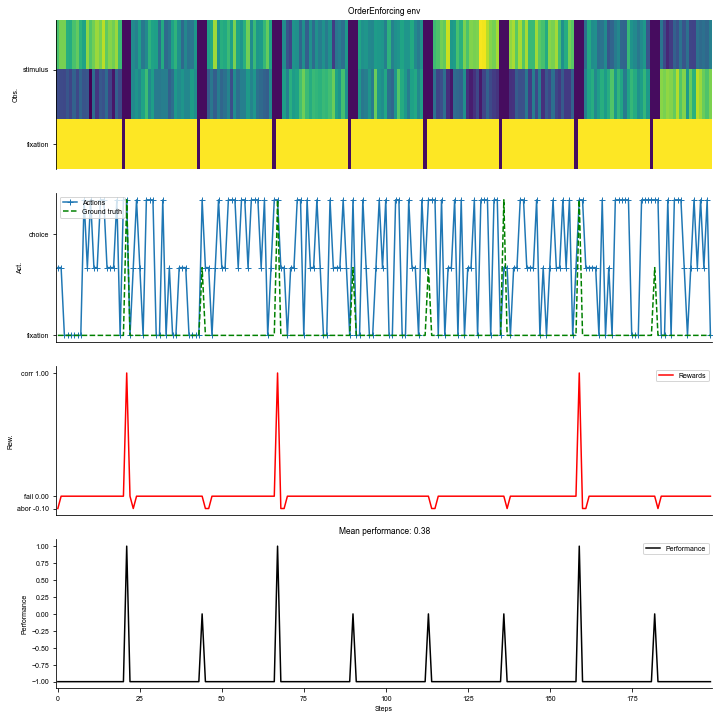

In [23]:
# Plot several trials of the task with a random agent
f = plotting.plot_env(env, fig_kwargs={'figsize': (10, 10)}) #??? can we increase dpi? it's impossible to read labels

### 1.3. Sample dataset

After having defined how the task (*the environment*) is implemented and which are the training hyperparameters, we can now define a function that samples a dataset?? what is the dataset?? since it's hard to inspect dataset and enviroment objects, it would be good if you could describe in words what they contain, what fields / functions they have, etc - some intuition

In [27]:
def get_dataset(env_kwargs, training_kwargs):
    
    # ?? envid is not an argument given to the function, but it should be
    
    # Make supervised dataset using neurogym's Dataset class
    dataset = ngym.Dataset(envid, 
                           env_kwargs=env_kwargs, 
                           batch_size=training_kwargs['batch_size'],
                           seq_len=training_kwargs['seq_len'])
    env = dataset.env
    
    return dataset, env

In [28]:
# call function to sample
dataset, env = get_dataset(env_kwargs=env_kwargs, training_kwargs=training_kwargs)

### 1.4. Define network

We will now define the network that we want to train.

First, the number of units:
- the number (*dimensionality*) of inputs, 
- the number of hidden units?? remind them what are those
- the dimensionality of outputs

Then, we need to define the transfer function of the units. For now, we will use rectified linear units ?? Again I don't think Chris will necessarity have introduced this, so say what is Relu, maybe what's the advantage w.r.t. linear units. It will be useful if they had seen an equation x_t+1 = f(x_t) + u ... before.

In [30]:
# Set up config:
num_neurons = 64

net_kwargs = {'hidden_size': num_neurons,
              'action_size': env.action_space.n,       # ?? what is this: dim outputs? If so, say it in instruction
              'input_size': env.observation_space.shape[0]}   # ?? mention this is determined by environment

In the following, we define a `Net` class, which creates our network from standard modules in `pytorch`. Moreover, classes can have associated methods, which are functions specified uniquely for object of the respective class. Our Net class will have an associated `forward` method, which ?? explain what it does

In [9]:
# ?? explain what is a class...
class Net(nn Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        
        # INSTRUCTION 1: build a recurrent neural network with a single recurrent layer and rectified linear units
        self.vanilla = nn.RNN(input_size, hidden_size, nonlinearity='relu')
        self.linear = nn.Linear(hidden_size, output_size)

    # ??? the forward pass is very pytorchy language. Please explain to them the logic behind this.
    def forward(self, x):
        # INSTRUCTION 2: get the output of the network for a given input
        out, _ = self.vanilla(x)
        x = self.linear(out)
        return x, out

We will now create an *instance* of the `Net` class with the desired hyperparameters as defined above. We will then pass this network to our GPU for training.

In [31]:
# Define network instance from the Net class
net = Net(input_size=env.observation_space.shape[0],
          hidden_size=net_kwargs['hidden_size'],
          output_size=env.action_space.n)

# ?? again a very pyrtorch thing to do, tell them what this is
net = net.to(device)

### 1.5. Define loss and optimizer

?? Explain what are loss and optimizer... I think you can't escape a quick intuition about BPP ??(again even if Chris mentions these concepts, people will have forgotten)

In [35]:
# Define loss: instance of the CrossEntropyLoss class
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=training_kwargs['lr'])

### 1.6. Save config

In [36]:
training_kwargs['env_kwargs'] = env_kwargs
training_kwargs['net_kwargs'] = net_kwargs

# Save config
with open(get_modelpath(envid) / 'config.json', 'w') as f:
    json.dump(training_kwargs, f)

### 1.7. Supervised training of network

?? i don't like the external links - it will just distract attention from the important parts. Mention in the instruction whatever is necessary to understand the code.


[Explanation of training](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#define-the-network).

[Clarifications regarding zero_grad](https://discuss.pytorch.org/t/model-zero-grad-or-optimizer-zero-grad/28426).

[Clarifications regarding why we can make a forward pass calling net](https://discuss.pytorch.org/t/about-the-nn-module-forward/20858).

In [38]:
print('Training task ', envid)

num_epochs = 2000 # ?? explain what is num_epochs

# We'll keep track of the loss as we train. 
# It is initialized to zero and then monitored over training interations
running_loss = 0.0 

for i in range(num_epochs):
    
    # get inputs and labels and pass them to the GPU
    inputs, labels = dataset()
    inputs = torch.from_numpy(inputs).type(torch.float).to(device)
    labels = torch.from_numpy(labels.flatten()).type(torch.long).to(device)
    
    # zero the parameter gradients to avoid they accumulate ?? they won't know what this means
    # ?? maybe you can call it "re-initialize", which is more intuitive
    optimizer.zero_grad()

    # INSTRUCTION 3: get the output of the network for a given input # ?? say this is from forward pass
    outputs, _ = net(inputs)
    
    #reshape outputs
    outputs = outputs.view(-1, env.action_space.n)
    
    #  INSTRUCTION 4: compute loss with respect to the labels
    loss = criterion(outputs, labels)
    
    # INSTRUCTION 5: compute gradients # ?? it would be good for them to have had a reminder of the backward pass befpre this
    loss.backward()
    
    # INSTRUCTION 6: update weights
    optimizer.step()

    # print average loss over last 200 training iterations and save the current network
    running_loss += loss.item()
    if i % 200 == 199:
        print('{:d} loss: {:0.5f}'.format(i + 1, running_loss / 200))
        running_loss = 0.0
        
        # save current state of network's parameters
        torch.save(net.state_dict(), get_modelpath(envid) / 'net.pth')

print('Finished Training')

Training task  PerceptualDecisionMaking-v0
200 loss: 0.02291
400 loss: 0.02209
600 loss: 0.02000
800 loss: 0.02086
1000 loss: 0.02134
1200 loss: 0.02067
1400 loss: 0.02172
1600 loss: 0.01975
1800 loss: 0.01930
2000 loss: 0.02038
Finished Training


## 2. Analyze the trained RNN

### 2.1. Run network after training for analysis

[About tensor.detach](https://www.tutorialspoint.com/what-does-tensor-detach-do-in-pytorch) ?? Again, write this out

??Also, what does this part of the notebook do??

In [39]:
# load configuration file - we might have run the training on the cloud and might now open the results locally
with open(get_modelpath(envid) / 'config.json') as f:
    config = json.load(f)

First, we will reconstruct the environment from our config file, using a function to infer the timing of task events ??? isn't this written in config file?

In [41]:
def infer_test_timing(env):
    
    """Infer timing of environment for testing."""
    timing = {}
    for period in env.timing.keys():
        period_times = [env.sample_time(period) for _ in range(100)] # ?? where does the 100 come from
        timing[period] = np.median(period_times)
        
    return timing

In [42]:
# Environment
env = gym.make(envid, **config['env_kwargs'])

# call infer_test_timing
env.timing = infer_test_timing(env)
env.reset(no_step=True) # ?? what is this

/Users/heike/anaconda3/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


array([-0.39940926, -0.6024347 , -1.4553392 ], dtype=float32)

Now, we'll make a new instance of the `Net` class and populate it with hyperparameters from our config file, as well as the trained weights.

In [45]:
# Instantiate the network and print information ??? explain what the no grad does
# ??? also explain why we need to do the strange with... thing
with torch.no_grad():
    net = Net(input_size=config['net_kwargs']['input_size'],
              hidden_size=config['net_kwargs']['hidden_size'],
              output_size=config['net_kwargs']['action_size'])
    
    net = net.to(device) # pass to GPU for running forwards steps
    
    # load the trained network's parameters ?? weights?? from the saved file
    net.load_state_dict(torch.load(get_modelpath(envid) / 'net.pth'))

    # how many trials to run
    num_trial = 100
    
    # empty lists / dataframe to store activity, choices, and trial information
    activity = list()
    obs = list()
    info = pd.DataFrame()
    
    for i in range(num_trial):

        # create new trial
        env.new_trial()
        
        # read out the inputs in that trial
        inputs = torch.from_numpy(env.ob[:, np.newaxis, :]).type(torch.float)
        
        # INSTRUCTION 7: get the network's prediction for the current input
        action_pred, hidden = net(inputs)
        
        # Compute performance
        action_pred = action_pred.detach().numpy()
        
        # INSTRUCTION 8: get the network's choice #?? in order to know how action pred is encoded, 
        # ?? they'll have to inspect this, which however is not easy with the with() thing.. ideas?
        # ?? else tell them how action_pred is structured
        choice = np.argmax(action_pred[-1, 0, :])
        
        # INSTRUCTION 9: check if the choice is correct
        correct = choice == env.gt[-1]

        # Log trial info
        trial_info = env.trial
        trial_info.update({'correct': correct, 'choice': choice}) # write choices and outcome
        info = info.append(trial_info, ignore_index=True)
        
        # Log activity
        activity.append(np.array(hidden)[:, 0, :])
        
        # Log observations ?? what are these again?
        obs.append(env.ob)

    print('Average performance', np.mean(info['correct']))

activity = np.array(activity)
obs = np.array(obs)

# print stats of the activity: max, min, mean, std
print('Max: ' + str(np.max(activity)) + \
      ', Min: ' + str(np.min(activity)) + \
      ', Mean: ' + str(np.mean(activity)) + \
      ', Std: ' + str(np.std(activity)))

Average performance 0.87
Max: 5.076465, Min: 0.0, Mean: 0.15220807, Std: 0.46126184


### 2.2. General analysis

We will now inspect the network actity and observations. `activity` is of shape `[ntrials x nneurons x ntime]`, and observations ....

##### Plot example trial

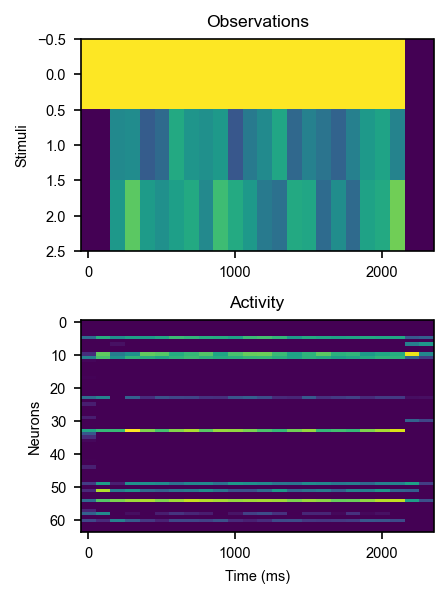

In [91]:
def plot_activity(activity, obs, config, trial):

    # Load and preprocess results
    f, ax = plt.subplots(figsize=(3,4), nrows=2, dpi=150)

    # time in ms
    t_plot = np.arange(activity.shape[1]) * config['dt']

    # INSTRUCTION 10: plot the observations for one trial
    ax[0].imshow(obs[trial].T, aspect='auto', vmin=0, vmax=1)
    ax[0].set_title('Observations')
    ax[0].set_ylabel('Stimuli')

    # change the xticks to show time in ms
    ax[0].set_xticks(np.arange(0, activity.shape[1], 10))
    ax[0].set_xticklabels(t_plot[::10])
    #     plt.colorbar(ax=ax[0]) # ??? what is the unit of observations? I'm generally confused

    # INSTRUCTION 11: plot the activity for one trial
    ax[1].imshow(activity[trial].T, aspect='auto', cmap='viridis')
    ax[1].set_title('Activity')
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('Neurons')
    #     plt.colorbar(ax=ax[1])

    # change the xticks to show time in ms
    ax[1].set_xticks(np.arange(0, activity.shape[1], 10))
    ax[1].set_xticklabels(t_plot[::10])

    plt.tight_layout()

plot_activity(activity=activity, obs=obs, config=config, trial=0)

You can see that some neurons have way higher activity than others ??? what does that mean...

To appreciate different temporal profiles better, we will first exclude silent neurons, and then min-max scale the acitvity across all trials (so that all neurons have the same maximum activity) and plot again.

In [89]:
silent_idx = np.where(activity.sum(axis=(0,1))==0)[0]

print('fraction of silent neurons:', len(silent_idx)/activity.shape[-1])

clean_activity = activity[:,:,np.delete(np.arange(activity.shape[-1]), silent_idx)]

fraction of silent neurons: 0.578125


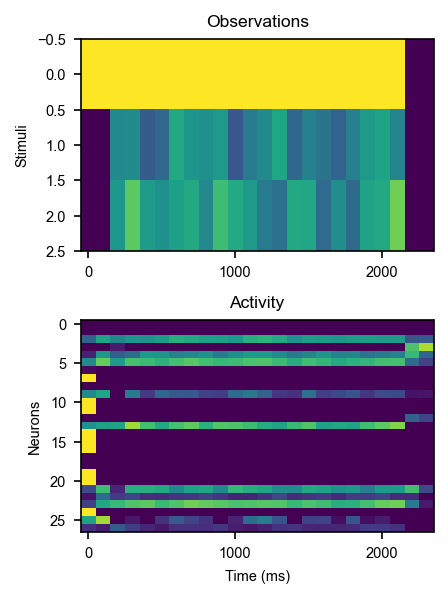

In [92]:
# min_max scaling
minmax_activity = np.array([neuron-neuron.min() for neuron in clean_activity.transpose(2,0,1)]).transpose(1,2,0)
minmax_activity = np.array([neuron/neuron.max() for neuron in minmax_activity.transpose(2,0,1)]).transpose(1,2,0)

plot_activity(activity=minmax_activity, obs=obs, config=config, trial=0)

We can see that about half of the neurons are silent. Other neurons have mixed activtity profiles, corresponding to the different task periods.

##### Plot average activity

?? this is not very instructive: Maybe better show clean_activity, separated by left vs right trials, as separate heatmaps nneurons x time

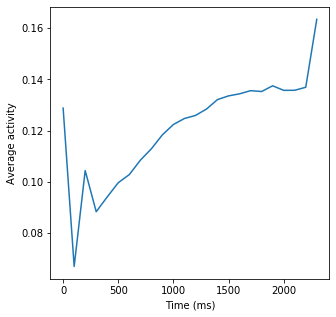

In [246]:
def analysis_average_activity(activity, config):
    
    f, ax = plt.subplots(figsize=(5, 5))
    t_plot = np.arange(activity.shape[1]) * config['dt']
    
    # INSTRUCTION 12: plot the average activity across neurons and trials
    ax.plot(t_plot, activity.mean(axis=0).mean(axis=-1))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Average activity')

analysis_average_activity(activity, config)

##### Plot Peristimulus histograms for the different conditions (ground-truth, reward, choice)

And a function to get the conditions of the task. ?? tell them what is the output

In [93]:
def get_conditions(info):
    """Get a list of task conditions to plot."""
    conditions = info.columns
    # This condition's unique value should be less than 5
    new_conditions = list()
    for c in conditions:
        try:
            n_cond = len(pd.unique(info[c]))
            if 1 < n_cond < 5:
                new_conditions.append(c)
        except TypeError:
            pass

    return new_conditions

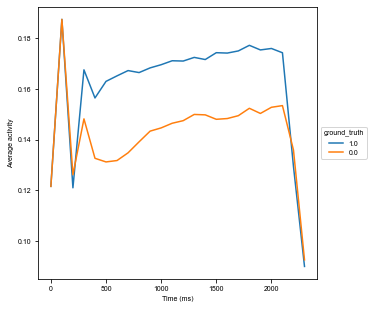

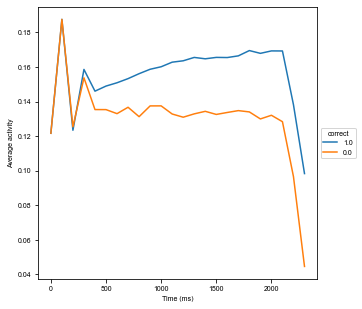

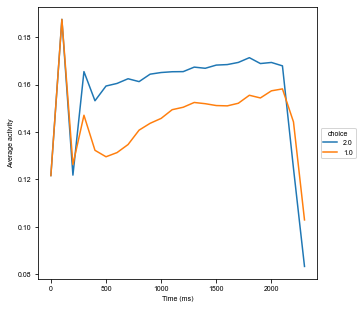

In [96]:
# ?? i think that two heatmaps showing single neurons would be nicer... 
# ?? these are cognitive neuroscientists, they don't know the beauty of single neurons but should get the chance to see!

def analysis_activity_by_condition(activity, info, config):
    
    conditions = get_conditions(info)
    
    for condition in conditions:
        values = pd.unique(info[condition])
        f, ax = plt.subplots(figsize=(5, 5))
        t_plot = np.arange(activity.shape[1]) * config['dt']
        for value in values:
            # INSTRUCTION 13: plot the average activity across neurons and trials for each condition
            # ?? what is each condition?? 
            a = activity[info[condition] == value]
            ax.plot(t_plot, a.mean(axis=0).mean(axis=-1), label=str(value))
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Average activity')
        plt.legend(title=condition, loc='center left', bbox_to_anchor=(1.0, 0.5))

analysis_activity_by_condition(activity, info, config)

#### Plot activity of example units by condition

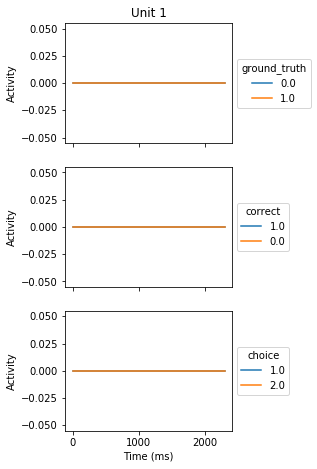

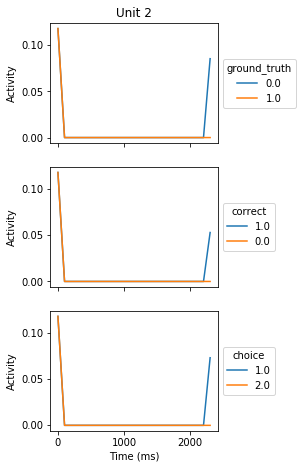

In [248]:
#??? i'd cut this and replace by the plot suggested above
def analysis_example_units_by_condition(activity, info, config):
    conditions = get_conditions(info)
    if len(conditions) < 1:
        return

    example_ids = np.array([0, 1])
    for example_id in example_ids:
        # INSTRUCTION 14: get the activity of the example unit
        example_activity = activity[:, :, example_id]
        fig, axes = plt.subplots(
                len(conditions), 1,  figsize=(3, 2.5 * len(conditions)),
                sharex=True)
        for i, condition in enumerate(conditions):
            ax = axes[i]
            values = pd.unique(info[condition])
            t_plot = np.arange(activity.shape[1]) * config['dt']
            for value in values:
                a = example_activity[info[condition] == value]
                ax.plot(t_plot, a.mean(axis=0), label=str(value))
            ax.legend(title=condition, loc='center left', bbox_to_anchor=(1.0, 0.5))
            ax.set_ylabel('Activity')
            if i == len(conditions) - 1:
                ax.set_xlabel('Time (ms)')
            if i == 0:
                ax.set_title('Unit {:d}'.format(example_id + 1))

analysis_example_units_by_condition(activity, info, config)

##### Plot principal components for different conditions

?? short intro of why we want to do that, and what is the basic idea of PCA 

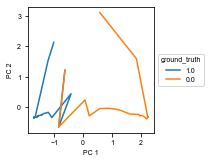

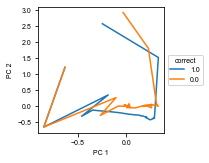

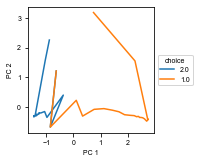

In [97]:
def analysis_pca_by_condition(activity, info, config):
    
    # Reshape activity to (N_trial x N_time, N_neuron)
    activity_reshape = np.reshape(activity, (-1, activity.shape[-1]))
    pca = PCA(n_components=2)
    # INSTRUCTION 15: fit the PCA model to the activity
    pca.fit(activity_reshape)

    conditions = get_conditions(info)
    for condition in conditions:
        values = pd.unique(info[condition])
        fig = plt.figure(figsize=(2.5, 2.5))
        ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])
        for value in values:
            # INSTRUCTION 16: get activity corresponding to condition and project it to the PCs
            a = activity[info[condition] == value].mean(axis=0)
            a = pca.transform(a)  # (N_time, N_PC)
            plt.plot(a[:, 0], a[:, 1], label=str(value))
        plt.legend(title=condition, loc='center left', bbox_to_anchor=(1.0, 0.5))

        plt.xlabel('PC 1')
        plt.ylabel('PC 2')

analysis_pca_by_condition(activity, info, config)